Name: JIMENEZ, JERVIZ MICO A.<br>
Course and Section: CPE32S3<br>
Date of Submission: 02/23/2024<br>
Instructor: ENGR. ROMAN RICHARD<br>

# Hands-on 4.1: Advanced Data Analytics and Machine Learning



# Objectives <br>
Part 1: Create a Decision Tree Classifier<br>
Part 2: Apply the Decision Tree Model<br>
Part 3: Evaluate the Decision Tree Model<br>

# Scenario/Background

In this lab you will create a decision tree classifier that will work with a data set which contains the details about
the more than 1300 hundred passengers who were onboard the passenger liner Titanic on its infamous maiden
voyage.

#Part 1: Performing Simple Linear Regression

In [ ]:
# --- Import the Libraries and Data ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

titanic = pd.read_csv("titanic_all_regression.csv")
titanic.head()

,Passenger,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


<Axes: >

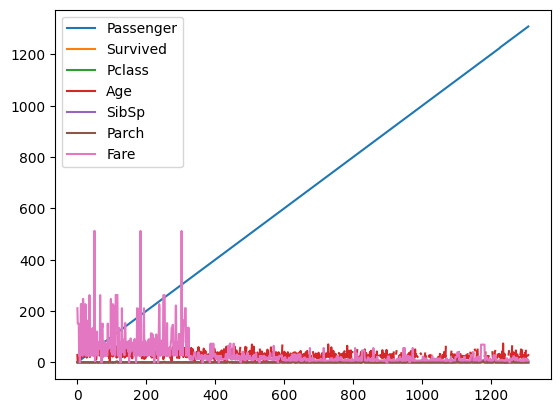

In [ ]:
# --- Plot the data ---

titanic.plot()

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Passenger  1308 non-null   int64  
 1   Survived   1308 non-null   int64  
 2   Pclass     1308 non-null   int64  
 3   Name       1308 non-null   object 
 4   Sex        1308 non-null   object 
 5   Age        1045 non-null   float64
 6   SibSp      1308 non-null   int64  
 7   Parch      1308 non-null   int64  
 8   Ticket     1308 non-null   object 
 9   Fare       1308 non-null   float64
 10  Cabin      295 non-null    object 
 11  Embarked   1306 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
titanic.dropna(subset=['Age'], inplace=True)
titanic.drop('Name', axis = 1, inplace=True)
titanic.drop('Sex', axis = 1, inplace=True)
titanic.drop('Cabin', axis = 1, inplace=True)
titanic.drop('Embarked', axis = 1, inplace=True)
titanic.drop('Ticket', axis = 1, inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1307
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Passenger  1045 non-null   int64  
 1   Survived   1045 non-null   int64  
 2   Pclass     1045 non-null   int64  
 3   Age        1045 non-null   float64
 4   SibSp      1045 non-null   int64  
 5   Parch      1045 non-null   int64  
 6   Fare       1045 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 65.3 KB


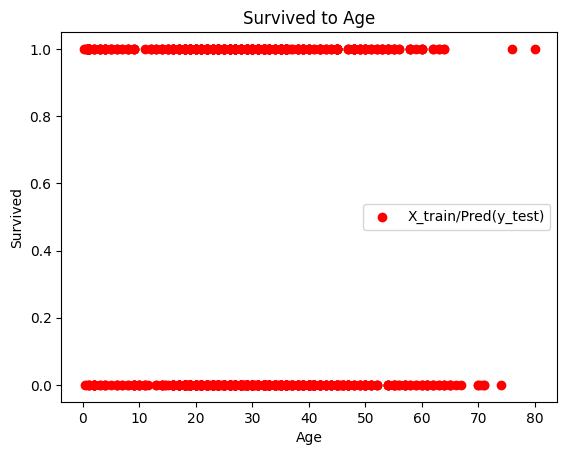

In [ ]:
# --- Perform simple linear regression on the survival feature column ---

plt.scatter(titanic['Age'], titanic['Survived'], color = 'red')
plt.title('Survived to Age')
plt.xlabel('Age')
plt.ylabel('Survived')
X = titanic.iloc[:, :1]
y = titanic.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = '', loc='best', facecolor='white')
plt.show()

#Part 2: Decision Tree Classification

In [ ]:
#---Create the Dataframe ---

import pandas as pd
training = pd.read_csv("titanic_train.csv")

In [ ]:
# --- Verify the contents of the training dataframe using the pands info() method ---

df = pd.DataFrame(training)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# --- View the first few rows of data ---

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# --- Replace string data with numeric labels ---

training["Sex"] = training["Sex"].apply(lambda toLabel: 0 if toLabel ==
'male' else 1)

In [ ]:
# --- Verify that the gender variable has been changed ---

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# --- Address missing values in the dataset ---

training["Age"].fillna(training["Age"].mean(), inplace=True)

# --- Verify that the values has been replaced ---

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
# --- Create an array object with the variable that will be the target for the model ---

y_target = training["Survived"].values

In [ ]:
# --- Create an array of the values that will be the input for the model ---

columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
X_input = training[list(columns)].values

In [ ]:
# --- Create the learned model ---

from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train = clf_train.fit(X_input, y_target)

In [ ]:
# --- Evaluate the model ---

clf_train.score(X_input, y_target)

0.8226711560044894

In [ ]:
# --- Create the intermediate file output ---

from six import StringIO
with open("./sample_data/titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

In [ ]:
# --- Convert the intermediate file to a graphic ---

!dot -Tpng ./sample_data/titanic.dot -o ./sample_data/titanic.png

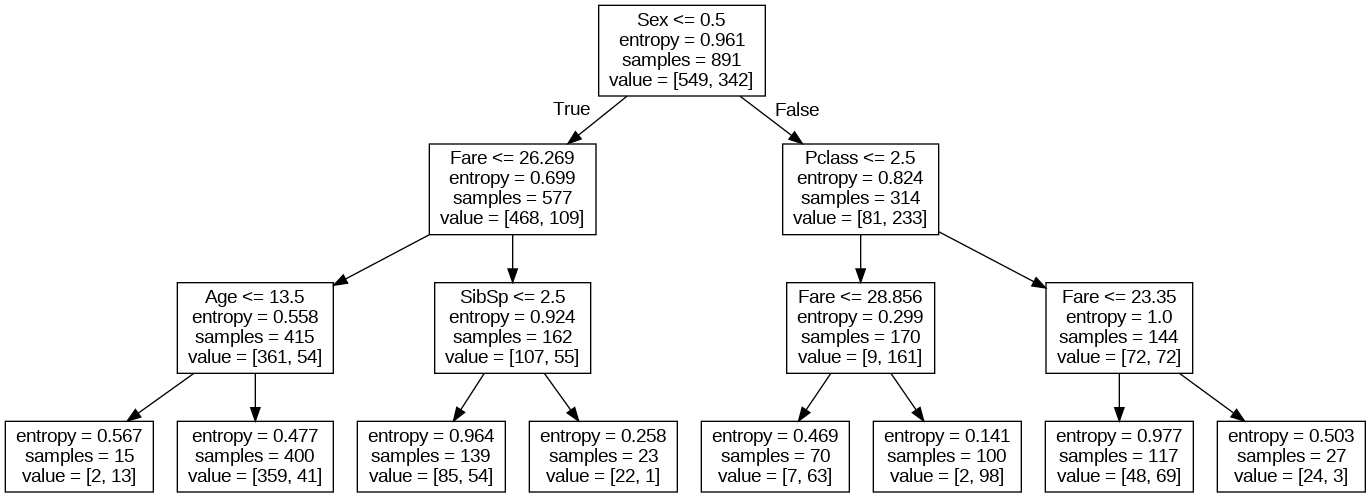

In [ ]:
# --- Display the image ---

from IPython.display import Image
Image("./sample_data/titanic.png")

In [ ]:
# --- Interpret the tree --

# The group with the most deaths are Men who paid a fare of more than 26.269 and has 1 or 2
# Siblings or Spouse on board (Men, Fare > 26.269, SibSp <= 2.5)

# The group with the most survivors are Men who paid a fare of less than 26.269 and is at the age
# of above 13.5 (Men, Fare <= 26.269, Age > 13.5)

In [ ]:
# --- Import the data ---

testing = pd.read_csv("./titanic_test.csv")
df = pd.DataFrame(testing)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# --- Use lambda expression to replace the "male" and "female" values with 0 for male and 1 for female ---

testing["Sex"] = testing["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [ ]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# --- Replace the missing age values with the mean of the ages ---

testing["Age"].fillna(testing["Age"].mean(), inplace=True)

In [ ]:
# --- Verify that the values have been replaced ---

df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
testing["Fare"].fillna(testing["Fare"].mean(), inplace=True)
testing["Cabin"].fillna("NA", inplace=True)

In [ ]:
# --- Create the array of input variables from the testing data set ---

X_input = testing[list(columns)].values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [ ]:
# --- Apply the model to the testing data set ---

target_labels = clf_train.predict(X_input)
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

In [ ]:
# --- Evaluate the accuracy of the estimated labels ---

import numpy as np
all_data = pd.read_csv("titanic_all.csv")
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
print(acc)

0.7682619647355163


In [ ]:
# --- Import the data ---

all_data = pd.read_csv("titanic_all.csv", usecols=['Survived','Pclass','Sex','Age','SibSp','Fare'])
df = pd.DataFrame(all_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Sex       1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


In [ ]:
# --- Replace the missing age values with the mean of the age of all members of the data set ---

all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)
all_data["Sex"] = all_data["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


In [ ]:
# --- Designate the input variables and output variables and generate the arrays ---

from sklearn.model_selection import train_test_split

X = all_data[list(columns)].values
y = all_data["Survived"].values

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [ ]:
# --- Train the model and fit it to the testing data ---

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train = clf_train.fit(X_train, y_train)

In [ ]:
# --- Compare models bt scoring each ---

train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816
